In [1]:
# Base libraries
import time
import datetime
import os

# Scientific librariesz
import numpy as np
import pandas as pd

# Visual libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_consolidado = pd.read_csv('data/1-bronce/Consolidado-SIMAT-2017-2021.csv', index_col=0, encoding='UTF-8')

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (5,33,36,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/conda/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df_consolidado.head(2)

,ANO_INF,CODIGO_DANE,CODIGO_DANE_SEDE,TIPO_DOCUMENTO,NRO_DOCUMENTO,APELLIDO1,APELLIDO2,NOMBRE1,NOMBRE2,DIRECCION_RESIDENCIA,...,SIT_ACAD_ANIO_ANT,CON_ALUM_ANIO_ANT,ZONA_RESI_ALU,VALORACION1,VALORACION2,CODIGO_INTERNADO,EDAD,NIVEL,DIR_NUM_LOCALIDAD,DIR_LOCALIDAD
0,2017,111001000078,111001000078,2,00010803853,CRUZ,CANO,LAURA,VALENTINA,CL 69 A 105 F 67,...,1,9.0,1,,,3,17,4,16,PUENTE ARANDA
1,2017,111001000078,111001014834,3,05057637,NAVAS,GONZALEZ,SUJEIBY,VALENTINA,CL 34 SUR 40 A 51,...,0,9.0,1,,,3,4,1,16,PUENTE ARANDA


In [4]:
df_consolidado = df_consolidado[['ANO_INF', 'CODIGO_DANE', 'CODIGO_DANE_SEDE', 'TIPO_DOCUMENTO', 'NRO_DOCUMENTO', 'APELLIDO1', 'APELLIDO2', 'NOMBRE1', 'NOMBRE2', 'DIRECCION_RESIDENCIA', 'REPITENTE']]
df_consolidado

,ANO_INF,CODIGO_DANE,CODIGO_DANE_SEDE,TIPO_DOCUMENTO,NRO_DOCUMENTO,APELLIDO1,APELLIDO2,NOMBRE1,NOMBRE2,DIRECCION_RESIDENCIA,REPITENTE
0,2017,111001000078,111001000078,2,00010803853,CRUZ,CANO,LAURA,VALENTINA,CL 69 A 105 F 67,N
1,2017,111001000078,111001014834,3,05057637,NAVAS,GONZALEZ,SUJEIBY,VALENTINA,CL 34 SUR 40 A 51,N
2,2017,111001000078,111001014834,3,067289989,RODRIGUEZ,GONZALEZ,SANTIAGO,JOSE,KR 54 SUR 50 B 10,N
3,2017,111001000078,111001014834,3,071759788,AQUILES,,HERNANDEZ,MILANO,KR 40 28 A 02 SUR,N
4,2017,111001000078,111001014834,3,089980482,ESPIN,CARDOZO,STEFANI,ALEJANDRA,KR 40 28 A 02 SUR,N
...,...,...,...,...,...,...,...,...,...,...,...
4464566,2021,411102000293,411102000293,2,1012336508,REBELLON,TORRES,DAYANA,SULEY,KR 105 B 65 81 SUR,N
4464567,2021,411102000293,411102000293,2,1016713910,CARRILLO,TORRES,ASLHEY,DAYANNA,KR 99 A 71 39 SUR,N
4464568,2021,411102000293,411102000293,2,1011090034,PEREZ,CUERVO,KAROLL,MICHELLE,CL 62 SUR 93 C 53,N
4464569,2021,411102000293,411102000293,2,1011092068,MORALES,RODRIGUEZ,VALERIA,,CL 61 B SUR 81 D 03,N


In [5]:
df_consolidado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4402945 entries, 0 to 4464570
Data columns (total 11 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   ANO_INF               int64 
 1   CODIGO_DANE           int64 
 2   CODIGO_DANE_SEDE      int64 
 3   TIPO_DOCUMENTO        int64 
 4   NRO_DOCUMENTO         object
 5   APELLIDO1             object
 6   APELLIDO2             object
 7   NOMBRE1               object
 8   NOMBRE2               object
 9   DIRECCION_RESIDENCIA  object
 10  REPITENTE             object
dtypes: int64(4), object(7)
memory usage: 403.1+ MB


In [6]:
text =""
var_types = []
for col in df_consolidado.columns:
    text += f"{col} --> {df_consolidado[col].unique()[:20]}\n{df_consolidado[col].dtype}\n\n"  
print(text)

ANO_INF --> [2017 2018 2019 2020 2021]
int64

CODIGO_DANE --> [111001000078 111001000124 111001000132 111001000272 111001000353
 111001000612 111001001121 111001001279 111001001538 111001002330
 111001002895 111001002909 111001006122 111001006483 111001006769
 111001008389 111001009148 111001009521 111001009580 111001009652]
int64

CODIGO_DANE_SEDE --> [111001000078 111001014834 111001014842 111001000124 111001014303
 111001000132 111001000272 111001029122 111001000353 111001000612
 111001110124 111001001121 111001013536 111001013544 111001013480
 111001001279 111001034771 111001034649 111001001538 111001002330]
int64

TIPO_DOCUMENTO --> [ 2  3  5  7  1  6  8  9 10 11 12]
int64

NRO_DOCUMENTO --> ['00010803853' '05057637' '067289989' '071759788' '089980482' '090058356'
 '1000003730' '1000004716' '1000007657' '1000008029' '1000017028'
 '1000017503' '1000033547' '1000034165' '1000036048' '1000036855'
 '1000048883' '1000048957' '1000064011' '1000064047']
object

APELLIDO1 --> ['CRUZ' 'NAV

In [7]:
df_consolidado['CODIGO_DANE'].astype(str).str.len().value_counts()

12    4402945
Name: CODIGO_DANE, dtype: int64

In [8]:
df_consolidado['CODIGO_DANE'].isnull().value_counts()

False    4402945
Name: CODIGO_DANE, dtype: int64

In [9]:
df_consolidado['CODIGO_DANE_SEDE'].astype(str).str.len().value_counts()

12    4402945
Name: CODIGO_DANE_SEDE, dtype: int64

In [10]:
df_consolidado['CODIGO_DANE_SEDE'].isnull().value_counts()

False    4402945
Name: CODIGO_DANE_SEDE, dtype: int64

In [11]:
df_consolidado['TIPO_DOCUMENTO'].value_counts()

5     1869936
2     1644939
7      679839
8       70453
1       67988
3       43987
6       14612
10       6646
11       3165
9         859
12        521
Name: TIPO_DOCUMENTO, dtype: int64

In [12]:
df_consolidado['NRO_DOCUMENTO'] = df_consolidado['NRO_DOCUMENTO'].astype(str)

In [13]:
df_consolidado['NRO_DOCUMENTO'].str.contains('\D', regex=True).value_counts()

False    4321467
True       81478
Name: NRO_DOCUMENTO, dtype: int64

In [14]:
((df_consolidado['NRO_DOCUMENTO'].str.contains('\D', regex=True)) & (df_consolidado['TIPO_DOCUMENTO'].isin([1,2,3]))).value_counts()

False    4400079
True        2866
dtype: int64

In [15]:
df_consolidado['NRO_DOCUMENTO'].str.contains('^0', regex=True).value_counts()

False    4395614
True        7331
Name: NRO_DOCUMENTO, dtype: int64

In [16]:
df_consolidado[df_consolidado['NRO_DOCUMENTO'].str.contains('\D', regex=True, na=False)]['TIPO_DOCUMENTO'].value_counts()

8     69729
7      6028
5      2181
3      2135
2       712
6       377
11      248
9        49
1        19
Name: TIPO_DOCUMENTO, dtype: int64

In [17]:
df_consolidado['DIRECCION_RESIDENCIA'] = df_consolidado['DIRECCION_RESIDENCIA'].astype(str)

In [18]:
df_consolidado['NRO_DOCUMENTO'].isna().value_counts()

False    4402945
Name: NRO_DOCUMENTO, dtype: int64

In [19]:
df_consolidado['APELLIDO1'] = df_consolidado['APELLIDO1'].astype(str)

In [20]:
df_consolidado['APELLIDO1'].str.contains('^\w*$', regex=True, na=False).value_counts()

True     4295629
False     107316
Name: APELLIDO1, dtype: int64

In [21]:
df_consolidado[~df_consolidado['APELLIDO1'].str.contains('^\w*$', regex=True, na=False)]

,ANO_INF,CODIGO_DANE,CODIGO_DANE_SEDE,TIPO_DOCUMENTO,NRO_DOCUMENTO,APELLIDO1,APELLIDO2,NOMBRE1,NOMBRE2,DIRECCION_RESIDENCIA,REPITENTE
7,2017,111001000078,111001000078,2,1000004716,MU�OZ,PINZON,MARYORI,,CL 29 A SUR # 50 - 41 PL 2,N
8,2017,111001000078,111001000078,7,1000007657,CASTA�EDA,HERRERA,CAROL,NATALIA,CL 28 SUR # 51 F - 81,N
15,2017,111001000078,111001014842,2,1000036855,PE�UELA,LAGUADO,CRISTIAN,CAMILO,CL 34 SUR 50 A 46,N
22,2017,111001000078,111001000078,2,1000116986,QUI�ONES,ANGULO,JEFERSON,ALEXANDER,KR 78 BIS 40 A 92 SUR,N
51,2017,111001000078,111001000078,5,1000161969,PI�A,RINCON,JESUS,DAVID,CL 29 A # 50 B - 66,N
...,...,...,...,...,...,...,...,...,...,...,...
4459138,2021,211850001481,211850001481,5,1140926882,DE ANGEL,TORRES,SHAYLET,,KR 2 BIS ESTE 65 D 24 SUR,N
4459178,2021,211850001481,211850001481,5,1084456364,DE LA CRUZ,MARTINEZ,SAMUEL,DAVID,CL 22 12 G 16 SUR,N
4459580,2021,211850001481,211850001481,5,1084462735,DE LA CRUZ,PAREJO,SALOME,JOHANNA,KR 7 C ESTE 65 4 SUR,N
4459641,2021,311001000158,311001000158,2,1016945636,DEL VILLAR,TRIANA,SANTIAGO,,CL 34 BIS SUR 95 A 70,N


In [22]:
tipos = {
    1 : 'Cédula de Ciudadanía',
    2 : 'Tarjeta de Identidad',
    3 : 'Cédula de Extranjería ',
    5 : 'Registro Civil de Nacimiento',
    6 : 'Número de Identificación Personal (NIP)',
    7 : 'Número Único de Identificación Personal (NUIP)',
    8 : 'Número de Identificación establecido por la Secretaría de  Educación',
    9 : 'Certificado Cabildo',                                                                                                         
    10: 'Permiso Especial de Permanencia',
    11: 'Visa',
    12: 'Tarjeta de movilidad fronteriza'
}
documentos = df_consolidado.groupby(['TIPO_DOCUMENTO']).count().reset_index()
documentos['TIPO_DOCUMENTO'] = documentos['TIPO_DOCUMENTO'].replace(tipos)

In [23]:
documentos

,TIPO_DOCUMENTO,ANO_INF,CODIGO_DANE,CODIGO_DANE_SEDE,NRO_DOCUMENTO,APELLIDO1,APELLIDO2,NOMBRE1,NOMBRE2,DIRECCION_RESIDENCIA,REPITENTE
0,Cédula de Ciudadanía,67988,67988,67988,67988,67988,67988,67988,67988,67988,67988
1,Tarjeta de Identidad,1644939,1644939,1644939,1644939,1644939,1644939,1644938,1644937,1644939,1644939
2,Cédula de Extranjería,43987,43987,43987,43987,43987,43987,43987,43986,43987,43987
3,Registro Civil de Nacimiento,1869936,1869936,1869936,1869936,1869936,1869936,1869936,1869934,1869936,1869936
4,Número de Identificación Personal (NIP),14612,14612,14612,14612,14612,14612,14612,14612,14612,14612
5,Número Único de Identificación Personal (NUIP),679839,679839,679839,679839,679839,679839,679839,679827,679839,679839
6,Número de Identificación establecido por la Se...,70453,70453,70453,70453,70453,70453,70453,70453,70453,70453
7,Certificado Cabildo,859,859,859,859,859,859,859,859,859,859
8,Permiso Especial de Permanencia,6646,6646,6646,6646,6646,6646,6646,6646,6646,6646
9,Visa,3165,3165,3165,3165,3165,3165,3165,3165,3165,3165


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Cédula de Ciudadanía'),
  Text(1, 0, 'Tarjeta de Identidad'),
  Text(2, 0, 'Cédula de Extranjería '),
  Text(3, 0, 'Registro Civil de Nacimiento'),
  Text(4, 0, 'Número de Identificación Personal (NIP)'),
  Text(5, 0, 'Número Único de Identificación Personal (NUIP)'),
  Text(6, 0, 'Número de Identificación establecido por la Secretaría de  Educación'),
  Text(7, 0, 'Certificado Cabildo'),
  Text(8, 0, 'Permiso Especial de Permanencia'),
  Text(9, 0, 'Visa'),
  Text(10, 0, 'Tarjeta de movilidad fronteriza')])

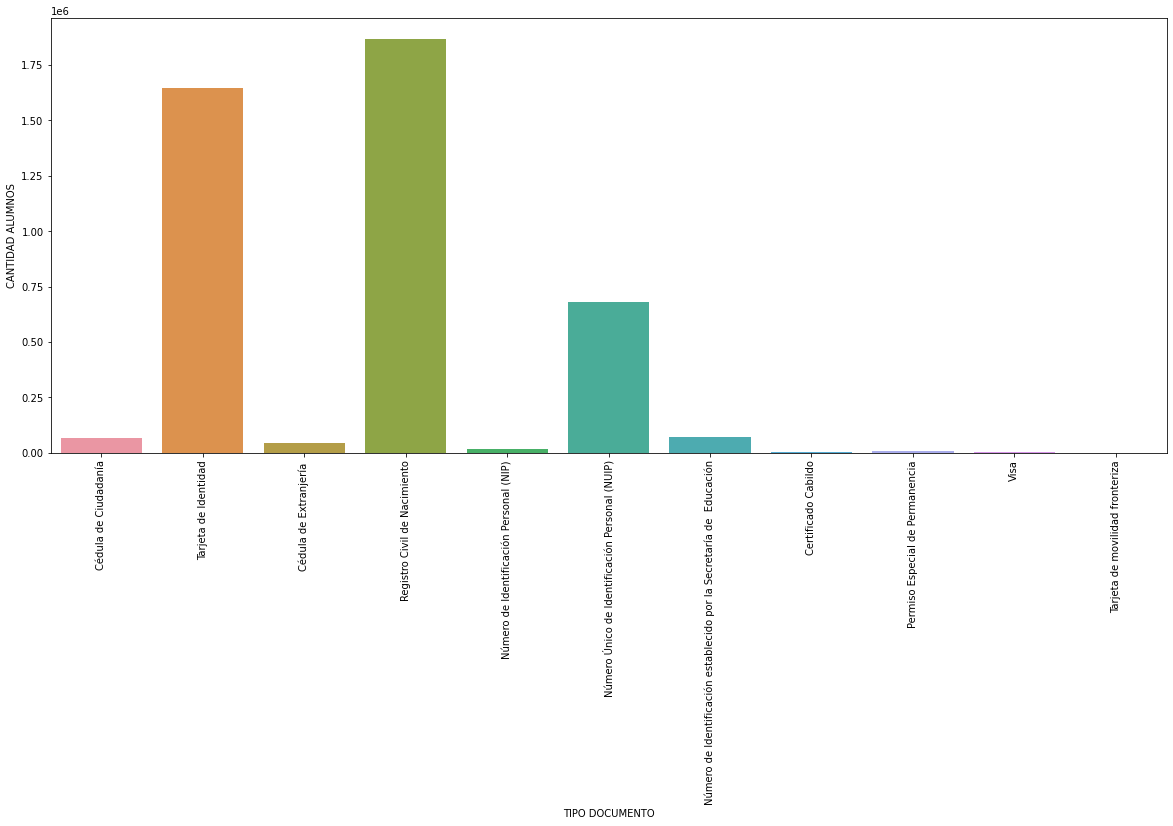

In [24]:
plt.figure(figsize=(20,8))
fig = sns.barplot(x="TIPO_DOCUMENTO", y="NRO_DOCUMENTO", data=documentos)
fig.set(xlabel='TIPO DOCUMENTO', ylabel='CANTIDAD ALUMNOS')
plt.xticks(rotation = 90)

In [25]:
df_doc_repitentes_ano = df_consolidado.groupby(['TIPO_DOCUMENTO', 'REPITENTE']).count().reset_index()
df_doc_repitentes_ano['TIPO_DOCUMENTO'] = df_doc_repitentes_ano['TIPO_DOCUMENTO'].replace(tipos)
df_doc_repitentes_ano

,TIPO_DOCUMENTO,REPITENTE,ANO_INF,CODIGO_DANE,CODIGO_DANE_SEDE,NRO_DOCUMENTO,APELLIDO1,APELLIDO2,NOMBRE1,NOMBRE2,DIRECCION_RESIDENCIA
0,Cédula de Ciudadanía,N,67005,67005,67005,67005,67005,67005,67005,67005,67005
1,Cédula de Ciudadanía,S,983,983,983,983,983,983,983,983,983
2,Tarjeta de Identidad,N,1593425,1593425,1593425,1593425,1593425,1593425,1593424,1593423,1593425
3,Tarjeta de Identidad,S,51514,51514,51514,51514,51514,51514,51514,51514,51514
4,Cédula de Extranjería,N,42926,42926,42926,42926,42926,42926,42926,42925,42926
5,Cédula de Extranjería,S,1061,1061,1061,1061,1061,1061,1061,1061,1061
6,Registro Civil de Nacimiento,N,1835273,1835273,1835273,1835273,1835273,1835273,1835273,1835271,1835273
7,Registro Civil de Nacimiento,S,34663,34663,34663,34663,34663,34663,34663,34663,34663
8,Número de Identificación Personal (NIP),N,14514,14514,14514,14514,14514,14514,14514,14514,14514
9,Número de Identificación Personal (NIP),S,98,98,98,98,98,98,98,98,98


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Cédula de Ciudadanía'),
  Text(1, 0, 'Tarjeta de Identidad'),
  Text(2, 0, 'Cédula de Extranjería '),
  Text(3, 0, 'Registro Civil de Nacimiento'),
  Text(4, 0, 'Número de Identificación Personal (NIP)'),
  Text(5, 0, 'Número Único de Identificación Personal (NUIP)'),
  Text(6, 0, 'Número de Identificación establecido por la Secretaría de  Educación'),
  Text(7, 0, 'Certificado Cabildo'),
  Text(8, 0, 'Permiso Especial de Permanencia'),
  Text(9, 0, 'Visa'),
  Text(10, 0, 'Tarjeta de movilidad fronteriza')])

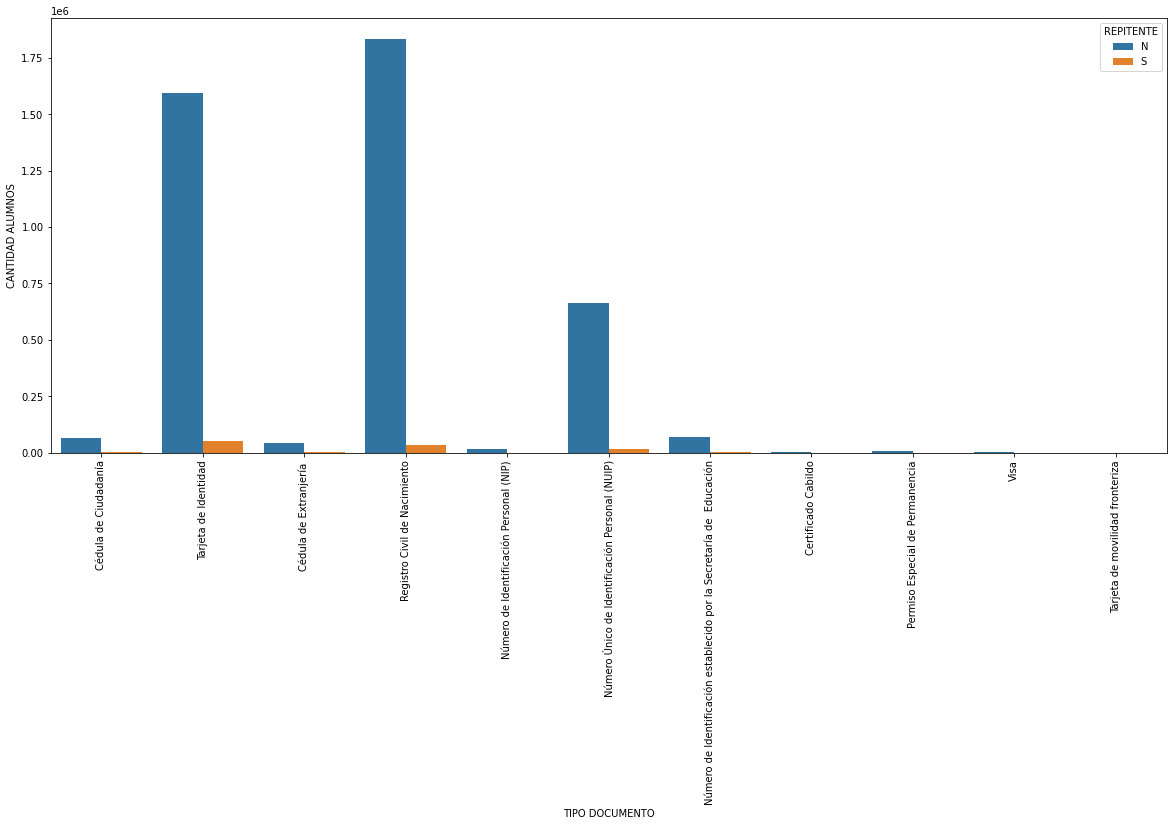

In [26]:
plt.figure(figsize=(20,8))
fig = sns.barplot(x="TIPO_DOCUMENTO", y="NRO_DOCUMENTO", hue='REPITENTE', data=df_doc_repitentes_ano)
fig.set(xlabel='TIPO DOCUMENTO', ylabel='CANTIDAD ALUMNOS')
plt.xticks(rotation = 90)

In [27]:
df_consolidado = df_consolidado[['ANO_INF', 'CODIGO_DANE', 'CODIGO_DANE_SEDE', 'TIPO_DOCUMENTO', 'NRO_DOCUMENTO', 'DIRECCION_RESIDENCIA']]
df_consolidado 

,ANO_INF,CODIGO_DANE,CODIGO_DANE_SEDE,TIPO_DOCUMENTO,NRO_DOCUMENTO,DIRECCION_RESIDENCIA
0,2017,111001000078,111001000078,2,00010803853,CL 69 A 105 F 67
1,2017,111001000078,111001014834,3,05057637,CL 34 SUR 40 A 51
2,2017,111001000078,111001014834,3,067289989,KR 54 SUR 50 B 10
3,2017,111001000078,111001014834,3,071759788,KR 40 28 A 02 SUR
4,2017,111001000078,111001014834,3,089980482,KR 40 28 A 02 SUR
...,...,...,...,...,...,...
4464566,2021,411102000293,411102000293,2,1012336508,KR 105 B 65 81 SUR
4464567,2021,411102000293,411102000293,2,1016713910,KR 99 A 71 39 SUR
4464568,2021,411102000293,411102000293,2,1011090034,CL 62 SUR 93 C 53
4464569,2021,411102000293,411102000293,2,1011092068,CL 61 B SUR 81 D 03


In [28]:
df_consolidado['NOMBRE_TIPO_DOCUMENTO'] = df_consolidado['TIPO_DOCUMENTO'].replace(tipos)
df_consolidado

<ipython-input-28-85c648b98646>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_consolidado['NOMBRE_TIPO_DOCUMENTO'] = df_consolidado['TIPO_DOCUMENTO'].replace(tipos)


,ANO_INF,CODIGO_DANE,CODIGO_DANE_SEDE,TIPO_DOCUMENTO,NRO_DOCUMENTO,DIRECCION_RESIDENCIA,NOMBRE_TIPO_DOCUMENTO
0,2017,111001000078,111001000078,2,00010803853,CL 69 A 105 F 67,Tarjeta de Identidad
1,2017,111001000078,111001014834,3,05057637,CL 34 SUR 40 A 51,Cédula de Extranjería
2,2017,111001000078,111001014834,3,067289989,KR 54 SUR 50 B 10,Cédula de Extranjería
3,2017,111001000078,111001014834,3,071759788,KR 40 28 A 02 SUR,Cédula de Extranjería
4,2017,111001000078,111001014834,3,089980482,KR 40 28 A 02 SUR,Cédula de Extranjería
...,...,...,...,...,...,...,...
4464566,2021,411102000293,411102000293,2,1012336508,KR 105 B 65 81 SUR,Tarjeta de Identidad
4464567,2021,411102000293,411102000293,2,1016713910,KR 99 A 71 39 SUR,Tarjeta de Identidad
4464568,2021,411102000293,411102000293,2,1011090034,CL 62 SUR 93 C 53,Tarjeta de Identidad
4464569,2021,411102000293,411102000293,2,1011092068,CL 61 B SUR 81 D 03,Tarjeta de Identidad


In [29]:
df_consolidado = df_consolidado[['ANO_INF', 'CODIGO_DANE', 'CODIGO_DANE_SEDE', 'TIPO_DOCUMENTO', 'NOMBRE_TIPO_DOCUMENTO', 'NRO_DOCUMENTO', 'DIRECCION_RESIDENCIA']]
df_consolidado 

,ANO_INF,CODIGO_DANE,CODIGO_DANE_SEDE,TIPO_DOCUMENTO,NOMBRE_TIPO_DOCUMENTO,NRO_DOCUMENTO,DIRECCION_RESIDENCIA
0,2017,111001000078,111001000078,2,Tarjeta de Identidad,00010803853,CL 69 A 105 F 67
1,2017,111001000078,111001014834,3,Cédula de Extranjería,05057637,CL 34 SUR 40 A 51
2,2017,111001000078,111001014834,3,Cédula de Extranjería,067289989,KR 54 SUR 50 B 10
3,2017,111001000078,111001014834,3,Cédula de Extranjería,071759788,KR 40 28 A 02 SUR
4,2017,111001000078,111001014834,3,Cédula de Extranjería,089980482,KR 40 28 A 02 SUR
...,...,...,...,...,...,...,...
4464566,2021,411102000293,411102000293,2,Tarjeta de Identidad,1012336508,KR 105 B 65 81 SUR
4464567,2021,411102000293,411102000293,2,Tarjeta de Identidad,1016713910,KR 99 A 71 39 SUR
4464568,2021,411102000293,411102000293,2,Tarjeta de Identidad,1011090034,CL 62 SUR 93 C 53
4464569,2021,411102000293,411102000293,2,Tarjeta de Identidad,1011092068,CL 61 B SUR 81 D 03


In [30]:
df_consolidado.to_csv('data/2-plata/Santiago_Consolidado-SIMAT-2017-2021')

In [ ]:
# df_consolidado = pd.read_csv('data/2-plata/Santiago_Consolidado-SIMAT-2017-2021', index_col=0, dtype={'ANO_INF': int,'CODIGO_DANE': int,'CODIGO_DANE_SEDE': int,'TIPO_DOCUMENTO': int,'NOMBRE_TIPO_DOCUMENTO': str,'NRO_DOCUMENTO': str,'DIRECCION_RESIDENCIA': str})
# df_consolidado

/opt/conda/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
